# Informe Tarea 3 #

## Introducción ##

El objetivo de este trabajo es experimentar con algoritmos genéticos para la selección de pesos (weights) y bias en redes neuronales aplicadas a diferentes problemas.

Los experimentos realizados corresponden a:
* Algoritmos genéticos para encontrar una secuencia de números (tanto en ints como floats).
* Algoritmos genéticos para encontrar una operación lógica con redes neuronales XOR.
* Algoritmos genéticos para clasificar un dataset real con redes neuronales.

## Experimentos ##

Se describirá los experimentos realizados y el código utilizado.

### Secuencia de números ###
En este experimeto se intentará encontrar una secuencia de números oculta utilizando redes neuronales (el código que se utilizará a continuación tambien se encuentra en el archivo bit_sequence.py).

En primer lugar se intentara encontrar una secuencia de solo unos y ceros.

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt
from genetic import Genetic
from genetic import Fit
from genetic import FitFloat

iteration:  0  max fit:  45  mean fit:  45.0
iteration:  1  max fit:  46  mean fit:  45.03
iteration:  2  max fit:  48  mean fit:  45.34
iteration:  3  max fit:  48  mean fit:  45.99
iteration:  4  max fit:  49  mean fit:  46.77
iteration:  5  max fit:  50  mean fit:  47.72
iteration:  6  max fit:  51  mean fit:  48.77
iteration:  7  max fit:  52  mean fit:  49.79
iteration:  8  max fit:  52  mean fit:  50.29
iteration:  9  max fit:  53  mean fit:  50.92
iteration:  10  max fit:  53  mean fit:  51.66
iteration:  11  max fit:  54  mean fit:  52.52
iteration:  12  max fit:  55  mean fit:  53.4
iteration:  13  max fit:  56  mean fit:  54.2
iteration:  14  max fit:  57  mean fit:  55.1
iteration:  15  max fit:  58  mean fit:  56.4
iteration:  16  max fit:  59  mean fit:  57.39
iteration:  17  max fit:  60  mean fit:  58.16
iteration:  18  max fit:  61  mean fit:  58.95
iteration:  19  max fit:  62  mean fit:  59.85
iteration:  20  max fit:  63  mean fit:  60.85
iteration:  21  max fit:  64

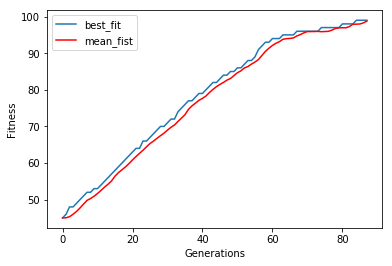

In [6]:
vec_size = 100
pop_size = 100
max_generation = 3000
answer = np.array([random.randint(0, 1) for i in range(vec_size)])

fit_class = Fit(answer)

bit_seq = Genetic(fitness_class=fit_class, gene_size=vec_size, population_size=pop_size, mut_rate=0.1, max_fitness=vec_size, n_pool=4)
fitest, best_vector, mean_vector = bit_seq.evolve(max_generation)
max_generation = best_vector.size

print('vector found at iteration', max_generation)
print('anwser: ', answer, ' found: ',fitest)
line_up, =  plt.plot(np.array([i for i in range(max_generation)]), best_vector, label='best_fit')
line_down, = plt.plot(np.array([i for i in range(max_generation)]), mean_vector, '-r', label='mean_fist')

plt.xlabel('Generations')
plt.ylabel('Fitness')

plt.legend(handles=[line_up, line_down])
plt.show()

El código anterior encuentra una secuencia de 100 numeros unos o zeros utilizando un algoritmo genetico.

La clase "Genetic" ubicada en el archivo "genetic.py" describe las fases de un algoritmo genetico genérico, mientras que la clase "Fit" contiene las funciones que se deben reescribir para cada caso particular. 

Se decidio mantener las clases "Fit*" en el mismo archivo (genetic.py) para poder utilizarlas en conjunto con la biblioteca multiprocessing y hacer de esta forma el calculo del fitness multiproceso.

A continuación se realiza un experimento para encontrar una secuencia de números de tipo float entre 0 y 1.

iteration:  0  max fit:  -0.353600760927  mean fit:  -2.06559351999
iteration:  1  max fit:  -0.312877304847  mean fit:  -1.34406468168
iteration:  2  max fit:  -0.239425031782  mean fit:  -0.897481949541
iteration:  3  max fit:  -0.0735413425776  mean fit:  -0.56917816558
iteration:  4  max fit:  -0.075612226605  mean fit:  -0.384461208238
iteration:  5  max fit:  -0.0382119034372  mean fit:  -0.243724343489
iteration:  6  max fit:  -0.0217200136499  mean fit:  -0.153549806287
iteration:  7  max fit:  -0.0217200136499  mean fit:  -0.09780250579
iteration:  8  max fit:  -0.0154932444091  mean fit:  -0.067606169217
iteration:  9  max fit:  -0.00995043740612  mean fit:  -0.0483493846048
iteration:  10  max fit:  -0.00796868379384  mean fit:  -0.0453013563459
iteration:  11  max fit:  -0.00390442876512  mean fit:  -0.0466197013759
iteration:  12  max fit:  -0.00356443100621  mean fit:  -0.0339364316077
iteration:  13  max fit:  -0.00327195421475  mean fit:  -0.0272624735053
iteration:  14

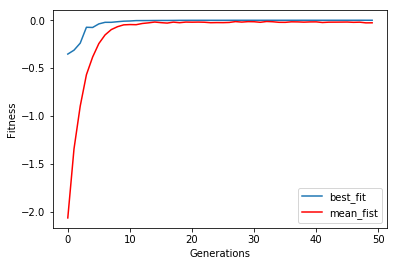

In [10]:
vec_size = 10
pop_size = 750
max_generation = 50
answer = np.array([random.uniform(0, 1) for i in range(vec_size)])

fit_class = FitFloat(answer)
vec_seq = Genetic(fitness_class=fit_class, gene_size=vec_size, population_size=pop_size, mut_rate=0.1, max_fitness=vec_size, n_pool=4)
fitest, best_vector, mean_vector = vec_seq.evolve(max_generation)
max_generation = best_vector.size

print('vector found at iteration', max_generation)
print('anwser: ', answer, ' found: ',fitest)

line_up, =  plt.plot(np.array([i for i in range(max_generation)]), best_vector, label='best_fit')
line_down, = plt.plot(np.array([i for i in range(max_generation)]), mean_vector, '-r', label='mean_fist')

plt.xlabel('Generations')
plt.ylabel('Fitness')

plt.legend(handles=[line_up, line_down])
plt.show()

El código intenta encontrar un vector aleatorio de 10 digítos.

Debido a la naturaleza discreta del alforitmo genético, no es posible encontrar exactamente el mismo vector. Sin embargo se llega a un error mínimo de 0.000272698865951 de diferencia total entre los vectores y si se comparan visualmente son muy similares.

En el segmento siguiente se deja comentado las clases Fit que se utilizaron para estos dos experimentos, ubicadas en "genetic.py".

In [11]:
#class Fit(object):
#     def __init__(self, ref=np.array([])):
#         self.ref = ref
# 
#     def random_individual(self, gene_num):
#         return np.array([self.random_gene_func(0, 1) for i in range(gene_num)])
# 
#     # Overwrite this function for especific problem
#     def random_gene_func(self, min, max):
#         return np.random.randint(min, max)
# 
#     # Overwrite this function for especific problem
#     def evaluate(self, vec):
#         return np.sum(np.logical_not(np.logical_xor(vec, self.ref)))
# 
#     # Overwrite this function for especific problem
#     def reproduce_parents(self, p1, p2):
#         n = p1.shape[0]
#         div = random.randint(1, n - 1)
#         return np.concatenate((p1[0:div], p2[div:n]))
# 
#     # Overwrite this function for especific problem
#     def mut_func(self, individual, mut_rate):
#         # Change one gene if mutation is activated
#         if (random.uniform(0, 1) <= mut_rate):
#             index = random.randint(0, individual.size-1)
#             individual[index] = int(not(individual[index]))
#         return individual
# 
# class FitFloat(Fit):
# 
#     def random_gene_func(self, min, max):
#         return np.random.uniform(min, max)
# 
#     def mut_func(self, individual, mut_rate):
#         # Change one gene if mutation is activated
#         if (random.uniform(0, 1) <= mut_rate):
#             index = random.randint(0, individual.size-1)
#             individual[index] = random.uniform(0,1)
#         return individual
# 
#     def evaluate(self, vec):
#         return -np.sum(np.power(vec - self.ref, 2))

### Simular XOR utilizando una red neuronal ###

Para esta ocasión se utilizaŕa la biblioteca de Redes Neuronales escrita para las tareas anteriores. Admás se debe definir una función Fit que describa el caso particular de un fitness para XOR.

La arquitectura elegida es [2,6,4,2,1] en donde el primer número son las entradas y desde el segundo en adelante la cantidad de neuronas por capa. Lo cual quiere decur una red neuronal de 2 entradas, 1 salida, 4 capas y con 6, 4, 2, 1 neuronas en cada una.

In [23]:
from genetic import FitXor
from neuron_network import NeuronNetwork

iteration:  0  max fit:  3  mean fit:  2.0
iteration:  1  max fit:  3  mean fit:  2.03
iteration:  2  max fit:  3  mean fit:  2.06
iteration:  3  max fit:  3  mean fit:  2.06
iteration:  4  max fit:  3  mean fit:  2.02
iteration:  5  max fit:  3  mean fit:  1.97
iteration:  6  max fit:  3  mean fit:  2.06
iteration:  7  max fit:  3  mean fit:  2.05
iteration:  8  max fit:  3  mean fit:  2.02
iteration:  9  max fit:  2  mean fit:  1.99
iteration:  10  max fit:  3  mean fit:  1.99
iteration:  11  max fit:  3  mean fit:  1.99
iteration:  12  max fit:  3  mean fit:  1.96
for input:  [0 0]  got output:  0.0
for input:  [1 0]  got output:  1.0
for input:  [0 1]  got output:  1.0
for input:  [1 1]  got output:  0.0
vector found at iteration 13
 found:  [array([ 5.69362871,  4.34846488,  6.46600893])
 array([ 9.63743775, -0.8875876 ,  4.02099072])
 array([ 5.92790356,  7.48777496, -4.43516555])
 array([ 9.51201896, -4.01938974,  4.05825117])
 array([ 9.75876488, -0.48786106, -5.21935185, -7.17

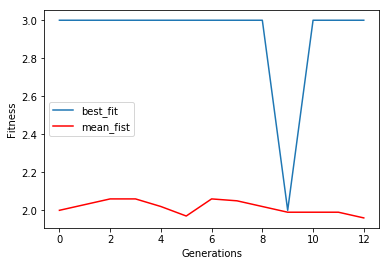

In [35]:
pop_size = 100
max_generation = 100

ar = np.array([2,4,2,1])
fit_clas = FitXor(ar)
vec_seq = Genetic(fitness_class=fit_class, population_size=pop_size, mut_rate=0.2, max_fitness=4, n_pool=4)
fitest, best_vector, mean_vector = vec_seq.evolve(max_generation)
max_generation = best_vector.size

def create_network(arqu):
    network = NeuronNetwork(arqu[0], 0.5)
    for i in range(1, arqu.size):
        network.add_layer(arqu[i])
    return network

network = create_network(ar)
network.from_list(fitest)

inp  = np.array([0, 0])
output = 1.0 if network.feed(inp)[0] > 0.5 else 0.0
print('for input: ', inp, " got output: ", output)

inp  = np.array([1, 0])
output = 1.0 if network.feed(inp)[0] > 0.5 else 0.0
print('for input: ', inp, " got output: ", output)


inp = np.array([0, 1])
output = 1.0 if network.feed(inp)[0] > 0.5 else 0.0
print('for input: ', inp, " got output: ", output)


inp = np.array([1, 1])
output = 1.0 if network.feed(inp)[0] > 0.5 else 0.0
print('for input: ', inp, " got output: ", output)

print('vector found at iteration', max_generation)
print(' found: ',fitest)

line_up, =  plt.plot(np.array([i for i in range(max_generation)]), best_vector, label='best_fit')
line_down, = plt.plot(np.array([i for i in range(max_generation)]), mean_vector, '-r', label='mean_fist')

plt.xlabel('Generations')
plt.ylabel('Fitness')

plt.legend(handles=[line_up, line_down])
plt.show()

Los pesos necesarios para simular un XOR con redes neuronales, son encontrados de esta forma.

En el segmento siguiente se adjunta comentado la clase FitXor (ubicada en "genetic.py") utilizada por el algoritmo.


In [15]:
#class FitXor(Fit):
# 
#     def __init__(self, arqu):
#         super().__init__()
#         self.arq = arqu
# 
#     def random_gene_func(self, min, max, n_weight):
#         return np.array([random.uniform(-10.0, 10.0) for i in range(n_weight+1)])
# 
#     def random_individual(self, gene_num):
#         indv = []
#         for j, val in enumerate(self.arq[0:self.arq.size-1]):
#             for i in range(self.arq[j+1]):
#                 indv.append(self.random_gene_func(0, 1, val))
#         return indv
# 
#     def evaluate(self, vec):
#         network = create_network(np.array(self.arq))
#         network.from_list(vec)
#         fit = 0
# 
#         input  = np.array([0, 0])
#         output = 1.0 if network.feed(input)[0] > 0.5 else 0.0
#         if output == xor_function(input[0], input[1]):
#             fit +=1
# 
#         input  = np.array([1, 0])
#         output = 1.0 if network.feed(input)[0] > 0.5 else 0.0
#         if output == xor_function(input[0], input[1]):
#             fit +=1
# 
#         input = np.array([0, 1])
#         output = 1.0 if network.feed(input)[0] > 0.5 else 0.0
#         if output == xor_function(input[0], input[1]):
#             fit += 1
# 
#         input = np.array([1, 1])
#         output = 1.0 if network.feed(input)[0] > 0.5 else 0.0
#         if output == xor_function(input[0], input[1]):
#             fit += 1
# 
#         return fit
# 
#     def mut_func(self, individual, mut_rate):
#         if (random.uniform(0, 1) <= mut_rate):
#             index = random.randint(0, len(individual) - 1)
#             index2 = random.randint(0, len(individual[index]) - 1)
# 
#             # Choose a random weight and negated
#             individual[index] [index2] = -individual[index] [index2]
# 
#             # Choose a random weight and change it for random
#             # individual[index][index2] = random.uniform(-2.0, 2.0)
# 
#         return individual
# 
#     def reproduce_parents(self, p1, p2):
#         child = np.copy(p1)
#         for i, gene in enumerate(p1):
#             if random.randint(0,1) == 1:
#                 child[i] = p2[i]
#         return child

### Dataset de Trigo (Wheat) ###

En una Tarea anterior se utilizo un dataset que contiene  tres clasificaciones de trigo segun 7 parametros de la semilla. Utilizando backpropagation se llego a obtener alrededor de 0.75 de precisión en la clasificación.

Se utilizará el algoritmo genético para intentar encontrar una red adecuada, utilizando como fitness el número de aciertos en el dataset. Los resultados se adjuntn de foma separada, ya que el código toma mas tiempo cuando es ejecutado desde jupyter.

In [36]:
import pandas as pd
from sklearn import preprocessing
from genetic import FitWheat

seeds= pd.read_csv('./data/seeds_dataset.txt', sep='\t')
seeds['t2'] = seeds['t1']
seeds['t3'] = seeds['t1']
seeds['t1'] = seeds['t1'].apply(lambda x: 1 if x==1 else 0)
seeds['t2'] = seeds['t2'].apply(lambda x: 1 if x==2 else 0)
seeds['t3'] = seeds['t3'].apply(lambda x: 1 if x==3 else 0)

min_max_scaler = preprocessing.MinMaxScaler()
seeds_scaled = min_max_scaler.fit_transform(np.array(seeds))

In [ ]:
pop_size = 150
max_generation = 2

ar = np.array([7, 10, 20, 10, 5, 3])
fit_class = FitWheat(arqu=ar, data=seeds_scaled)
vec_seq = Genetic(fitness_class=fit_class, population_size=pop_size, mut_rate=0.30, max_fitness=210, n_pool=4)
fitest, best_vector, mean_vector = vec_seq.evolve(max_generation)
max_generation = best_vector.size

def create_network(arqu):
    network = NeuronNetwork(arqu[0], 0.5)
    for i in range(1, arqu.size):
        network.add_layer(arqu[i])
    return network

network = create_network(ar)
network.from_list(fitest)

sumTrue = 0
errors = np.array([])
count = 0
for i in range(0, 200):
    count += 1
    inputs = np.array(seeds_scaled[i][0:7])
    raw_output = network.feed(inputs)
    output = [(1.0 if x > 0.5 else 0.0) for x in raw_output.tolist()]
    expected = np.array(seeds_scaled[i][7:10])

    errors = np.append(errors, np.sum(np.abs(expected - raw_output)))
    if output[0] == expected[0] and output[1] == expected[1] and output[2] == expected[2]:
        sumTrue += 1

precision = float(sumTrue) / float(count)
promError = np.mean(np.abs(errors))
print('prec: ', str(precision), 'error: ', str(promError))

print('vector found at iteration', max_generation)
print('fitest one: \n', fitest)
plt.plot(np.array([i for i in range(max_generation)]), best_vector)
plt.plot(np.array([i for i in range(max_generation)]), mean_vector, '-r')
plt.show()

```iteration:  0  max fit:  71  mean fit:  27.2666666667
iteration:  1  max fit:  128  mean fit:  37.7
iteration:  2  max fit:  70  mean fit:  40.4333333333
iteration:  3  max fit:  77  mean fit:  41.74
iteration:  4  max fit:  118  mean fit:  43.76
iteration:  5  max fit:  70  mean fit:  42.4066666667
iteration:  6  max fit:  70  mean fit:  53.3866666667
iteration:  7  max fit:  104  mean fit:  35.0866666667
iteration:  8  max fit:  92  mean fit:  43.1866666667
iteration:  9  max fit:  70  mean fit:  37.4533333333
iteration:  10  max fit:  70  mean fit:  40.54
iteration:  11  max fit:  70  mean fit:  49.8466666667
iteration:  12  max fit:  70  mean fit:  64.0666666667
iteration:  13  max fit:  70  mean fit:  62.0933333333
iteration:  14  max fit:  70  mean fit:  52.9266666667
iteration:  15  max fit:  70  mean fit:  56.9466666667
iteration:  16  max fit:  122  mean fit:  36.6066666667
iteration:  17  max fit:  70  mean fit:  20.2466666667
iteration:  18  max fit:  102  mean fit:  28.9933333333
iteration:  19  max fit:  124  mean fit:  38.8133333333
iteration:  20  max fit:  72  mean fit:  46.76
iteration:  21  max fit:  108  mean fit:  63.04
iteration:  22  max fit:  75  mean fit:  64.58
iteration:  23  max fit:  70  mean fit:  24.7333333333
iteration:  24  max fit:  70  mean fit:  20.4666666667
iteration:  25  max fit:  70  mean fit:  30.52
iteration:  26  max fit:  70  mean fit:  3.78666666667
iteration:  27  max fit:  78  mean fit:  60.62
iteration:  28  max fit:  127  mean fit:  47.9066666667
iteration:  29  max fit:  80  mean fit:  52.5
iteration:  30  max fit:  121  mean fit:  54.8733333333
iteration:  31  max fit:  71  mean fit:  57.3
iteration:  32  max fit:  70  mean fit:  65.3466666667
iteration:  33  max fit:  70  mean fit:  67.3266666667
iteration:  34  max fit:  70  mean fit:  66.1133333333
iteration:  35  max fit:  70  mean fit:  61.4466666667
iteration:  36  max fit:  0  mean fit:  0.0
iteration:  37  max fit:  70  mean fit:  70.0
iteration:  38  max fit:  0  mean fit:  0.0
iteration:  39  max fit:  70  mean fit:  10.62
iteration:  40  max fit:  70  mean fit:  70.0
iteration:  41  max fit:  70  mean fit:  67.7533333333
iteration:  42  max fit:  70  mean fit:  62.56
iteration:  43  max fit:  70  mean fit:  70.0
iteration:  44  max fit:  70  mean fit:  68.8466666667
iteration:  45  max fit:  70  mean fit:  4.42666666667
iteration:  46  max fit:  88  mean fit:  15.12
iteration:  47  max fit:  0  mean fit:  0.0
iteration:  48  max fit:  3  mean fit:  0.04
iteration:  49  max fit:  0  mean fit:  0.0
prec:  0.35 error:  1.15510249649```

<img src="./Figure_4.png">

Se llegan a resultados de 0.35 de precisión con estos parámetros.

En primera instancia backpropagation pareciera ser mejor forma de clasificar este dataset teniendo una red de arquitectura fija y cambiando solo los pesos, sin embargo durante la realización del experimento se ha constatado que la arquitectura misma de la red influye mucho en la forma que se comporta el algoritmo, probablemente por la forma discreta en que se utiliza el crossover entre individuos termina desembocando en que los individuos que se cruzan cada vez se parecen y más y por esto se estanca el crecimiento.

Como trabajo futuro se espera utilizar el algoritmo para cambiar otras propiedades de la red neuronal, como el número de layers o la forma que se conecta la misma red.

In [38]:
#class FitWheat(FitXor):
# 
#     def __init__(self, arqu, data):
#         super().__init__(arqu=arqu)
#         self.data = data
# 
#     def evaluate(self, vec):
#         network = create_network(np.array(self.arq))
#         network.from_list(vec)
# 
#         error = 0
#         sumTrue = 0
#         for i in range(210):
#             inputs = np.array(self.data[i][0:7])
#             raw_output = network.feed(inputs)
#             output = [(1.0 if x > 0.5 else 0.0) for x in raw_output.tolist()]
#             expected = np.array(self.data[i][7:10])
# 
#             error += np.sum(np.abs(expected - raw_output))
#             # if output[0] == expected[0]:
#             #     sumTrue += 1
#             # else:
#             #     sumTrue -= 1
#             # if output[1] == expected[1]:
#             #     sumTrue +=1
#             # else:
#             #     sumTrue -= 1
#             # if output[2] == expected[2]:
#             #     sumTrue +=1
#             # else:
#             #     sumTrue -= 1
# 
#             if output[0] == expected[0] and output[1] == expected[1] and output[2] == expected[2]:
#                 sumTrue += 1
# 
#         return sumTrue
# 
#     def random_gene_func(self, min, max, n_weight):
#         return np.array([random.uniform(-10.0, 10.0) for i in range(n_weight+1)])
# 
#     def mut_func(self, individual, mut_rate):
#         if (random.uniform(0, 1) <= mut_rate):
#         # for i in range(random.randint(0, len(individual) - 1)):
#             index = random.randint(0, len(individual) - 1)
#             index2 = random.randint(0, len(individual[index]) - 1)
# 
#             # Choose a random weight and negated
#             individual[index] [index2] = -individual[index] [index2]
# 
#             # Scale weight
#             # individual[index][index2] = individual[index][index2] * random.uniform(-2.0, 2.0)
# 
#                 # Choose a random weight and change it for random
#                 # individual[index][index2] = random.uniform(-2.0, 2.0)
# 
#         return individual